# `DSML_WS_10` - Classification 1
Please work on the following task **before** the tenth workshop session.

## 1. Introduction to Classification

As an example to introduce classification problems, we're going to turn to a classical example from the machine learning literature, first presented in [[Street et al, 1993]](https://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/WDBC/), namely identifying whether cancer cells from a biopsy are malignant or benign.  This was historically an important dataset in the intersection of machine learning and health care, and similar subjects are still a topic of very active research.  Of course, 25 years ago, the techniques were much more primitive and computationally less intensive than current approaches to similar problems, but the work has become a classical dataset in machine learning, and also represents a compelling applications.

To create the data set, researchers took 569 images of cancerous cells, under a microscope, and manually selected the outlines of the different cells (this step is the kind of thing that would ideally be replaced by automatic computer vision architectures in current systems).  The resulting figures looked like this:

![Image of (manually) selected outlines of cells under a microscope.](cancercells.png)

The researchers then considered 10 different features of each cell, for instance the area, perimeter, texture, number of concave points (i.e., indentations), variance of grayscale color, and some others (a full list can be found in the above paper).  For each of these 10 features they computed the mean, max, and standard deviation of the feature across all the cells in the image, resulting in a 30 dimensional vector describing each sample.

---

In this workshop, we will build on our existing knowledge and use a linear regression model to classify cancer cells as malignant or benign based on their mean area. As discussed in the lecture, linear regression has certain limitations when applied to classification tasks. These should be considered carefully. To better understand these limitations, follow the steps below to build and evaluate your first classification model:

In [2]:
# Import Packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.set_printoptions(suppress=True) # suppress scientific notation
%matplotlib inline

**Step 1:** Load the `breast_cancer.csv` dataset. The `diagnosis` column indicates whether the breast tissue is malignant (M) or benign (B).

- How many samples are classified as benign or malignant in total?
- Create a new variable called `diagnosis_rescaled`, and set it to 1 for malignant tumors and -1 for benign ones.

*Note: You can use the `.map()` function from Workshop 7 for this.*


In [6]:
#### your code here ####
df = pd.read_csv('breast_cancer.csv')

# Wie viele sind bösartig (M) oder gutartig (B)?
print(df['diagnosis'].value_counts())

# Neue Spalte: 1 für M, -1 für B
df['diagnosis_rescaled'] = df['diagnosis'].map({'M': 1, 'B': -1})
print(df['diagnosis_rescaled'].value_counts())

diagnosis
B    357
M    212
Name: count, dtype: int64
diagnosis_rescaled
-1    357
 1    212
Name: count, dtype: int64


**Step 2:** Preliminarily explore the relationship between cell-classification (`diagnosis_rescaled`) and the mean area of the cell (`area_mean`) by creating a scatter plot.

- Use different colors to represent the two classes of cells.
- Label your plot clearly.

What visual relationship can you identify between the mean area of the cell and the cell-classification?

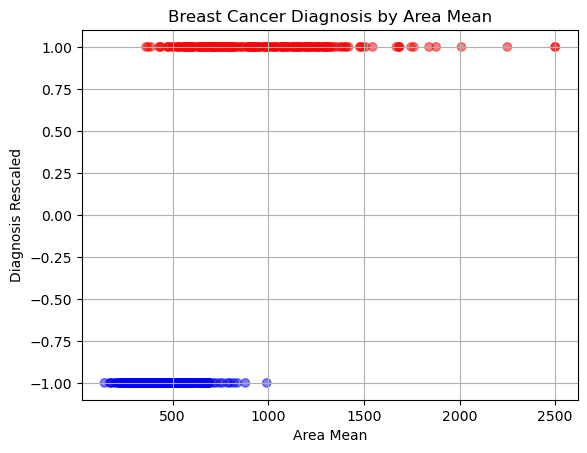

In [11]:
#### your code here ####
colors = df['diagnosis_rescaled'].map({1: 'red', -1: 'blue'})

#plt.figure(figsize=(8, 5))
plt.scatter(df['area_mean'], df['diagnosis_rescaled'], c=colors, alpha=0.5)

plt.xlabel('Area Mean')
plt.ylabel('Diagnosis Rescaled')
plt.title('Breast Cancer Diagnosis by Area Mean')

plt.grid(True)
plt.show()


**Step 3:** Fit a linear regression model to classify your newly defined variable `diagnosis_rescaled` using the mean area of the cell (`area_mean`).

- Reconsider your classification target: What numeric values is your linear model trying to fit?
- At what value of `area_mean` does your model predict $f(\hat{\theta}) = 0$? Can you interpret this value?

*Hint: You can find the point where $f(\hat{\theta}) = 0$ by using the functional form of your regression line and solving for `area_mean`.*

In [14]:
#### your code here ####

# Feature (X) und Ziel (y) definieren
X = df[['area_mean']]  # Eingabewert
y = df['diagnosis_rescaled']  # Zielwert

# Lineares Modell erstellen und trainieren
model = LinearRegression()
model.fit(X, y)

# Steigung und Achsenabschnitt auslesen
slope = model.coef_[0]
intercept = model.intercept_

# Modellbeschreibung ausgeben
print("Modell: Diagnose = {:.2f} * Zellfläche + {:.2f}".format(slope, intercept))

# Entscheidungsgrenze berechnen (f(x) = 0)
decision_point = -intercept / slope
print("Schwelle bei area_mean:", round(decision_point, 2))

Modell: Diagnose = 0.00 * Zellfläche + -1.53
Schwelle bei area_mean: 785.58


**Step 4:** Extend your previous scatter plot by adding the regression line and a vertical line indicating the value of `area_mean` where your model predicts zero. Set the y-axis limits to the interval [-5, 5]. Reflect on the loss function your model uses:

Considering the types of errors it produces, do you think this loss function is appropriate for classification tasks?


c:\Users\kilia\anaconda3\envs\DSML_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


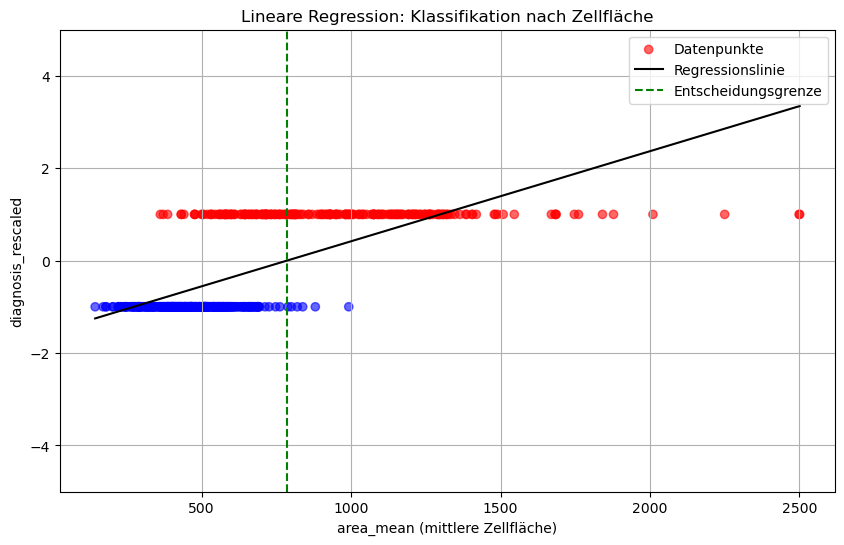

In [15]:
#### your code here ####
# Plot: Datenpunkte + Regressionslinie + Entscheidungsgrenze
x_vals = np.linspace(df['area_mean'].min(), df['area_mean'].max(), 100)
y_vals = model.predict(x_vals.reshape(-1, 1))

colors = df['diagnosis_rescaled'].map({1: 'red', -1: 'blue'})

plt.figure(figsize=(10, 6))
plt.scatter(df['area_mean'], df['diagnosis_rescaled'], c=colors, alpha=0.6, label='Datenpunkte')
plt.plot(x_vals, y_vals, color='black', label='Regressionslinie')
plt.axvline(x=decision_point, color='green', linestyle='--', label='Entscheidungsgrenze')

plt.ylim([-5, 5])
plt.xlabel('area_mean (mittlere Zellfläche)')
plt.ylabel('diagnosis_rescaled')
plt.title('Lineare Regression: Klassifikation nach Zellfläche')
plt.legend()
plt.grid(True)
plt.show()